In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns

#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

instapouf = pd.read_csv("../../../gruiickode/python/04-plot/data/instapouf.csv", sep=",")
#
#instapouf.head()
instapouf.describe()

,abo
count,140.000000
mean,1494.871429
std,697.107785
min,245.000000
25%,977.500000
50%,1333.000000
75%,2024.500000
max,3010.000000


In [2]:
#instapouf.shape
instapouf.shape[0]

140

In [3]:
instapouf.size

280

le plot simple donne une série aligné sur l'index, pas sur la valeur réelle de date. Deux essais en extrayant l'axe de la date pour le reformater :


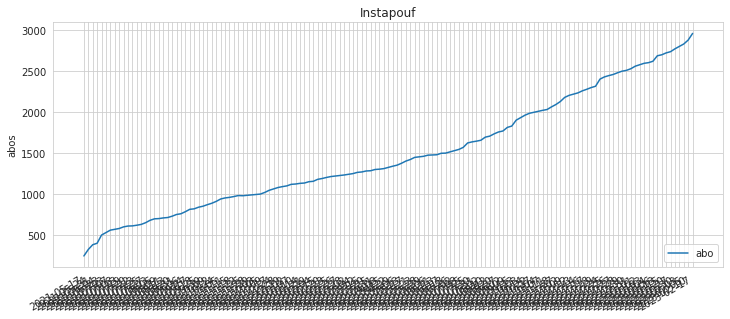

In [2]:
# extract dates
dates = instapouf['date']
dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

fig, ax = plt.subplots(figsize=(12,5))
plt.title("Instapouf")

#ax.plot('date', 'abo', data=instapouf)
ax.plot('abo', data=instapouf)
ax.xaxis_date()

# set the number of ticks on x-axis to be a list [0, ... ,R]
# R is the number of rows in the data (i.e. len(dates))
# this ensures ticklabels align with the corresponding data point
ax.set_xticks(np.arange(len(dates)))
ax.set_xticklabels(dates)     # set the ticklabels to the list of datetimes
ax.legend(loc=4, fontsize=10) # make a legend and place in bottom-right (loc=4)
#plt.xticks(rotation=30)       # rotate the xticklabels by 30 deg
ax = ax.set(ylabel='abos')

fig.autofmt_xdate()

#plt.plot(instapouf['date'], instapouf['abo'])
plt.show()

Text(71.75, 0.5, 'Followers')

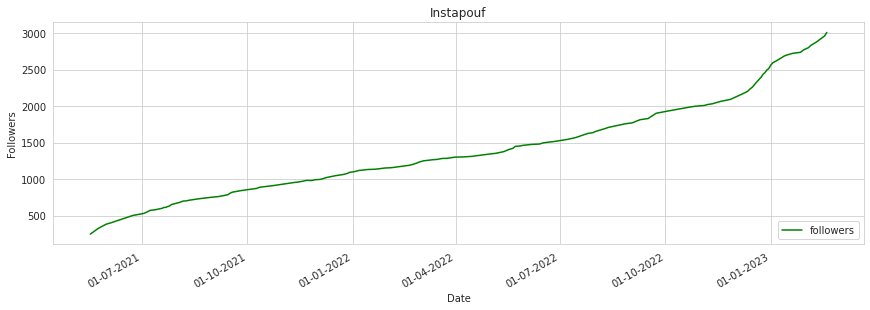

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

data = pd.read_csv('../../../gruiickode/python/04-plot/data/instapouf.csv')
data['date'] = pd.to_datetime(data['date'])
#data.sort_values('date', inplace=True)

plt.subplots(figsize=(12,4))
#plt.plot_date(data['date'], data['abo'], label='abo', linestyle='solid', marker=None)
plt.plot_date(data['date'], data['abo'], label='followers', fmt='-g')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.legend(loc=4, fontsize=10)
plt.title('Instapouf')
plt.xlabel('Date')
plt.ylabel('Followers')


In [ ]:
# date la plus proche:
def nearest(items, pivot):
    """ items: where to find, pivot: what to find """
    return min(items, key=lambda x: abs(x - pivot))

# another way (pandas):
df.iloc[df.index.get_loc(datetime.datetime(2016,2,2),method='nearest')]


In [62]:
# FIXME / TODO
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

data = pd.read_csv('../../../gruiickode/python/04-plot/data/instapouf.csv')
data['date'] = pd.to_datetime(data['date'])
#data.sort_values('date', inplace=True)

print(datetime.today().toordinal())

#current_idx = data['date'].sub(datetime.today().toordinal()).abs().idxmin()
#print(current_idx)

# y'a un probleme entre l'index et ['date']
val_current = data.iloc[data['date'].index.get_loc(datetime.today().toordinal(), method='nearest')]
print(f"cur: {val_current['abo']}")

previous = datetime.today() - timedelta(days=30)
print(f"previous: {previous.toordinal()}")

val_previous = data.iloc[data['date'].index.get_loc(previous.toordinal(), method='pad')]
print(f"prev: {val_previous['abo']}")

taux7 = ((val_current['abo'] - val_previous['abo']) / val_previous['abo']) * 100

print(f"{val_current['abo']}, {val_previous['abo']}, {taux7}")

"""
plt.subplots(figsize=(12,4))
#plt.plot_date(data['date'], data['abo'], label='abo', linestyle='solid', marker=None)
plt.plot_date(data['date'], data['abo'], label='followers', fmt='-g')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.legend(loc=4, fontsize=10)
plt.title('Instapouf')
plt.xlabel('Date')
plt.ylabel('Followers')
"""

738571
cur: 3010
previous: 738541
prev: 3010
3010, 3010, 0.0


"\nplt.subplots(figsize=(12,4))\n#plt.plot_date(data['date'], data['abo'], label='abo', linestyle='solid', marker=None)\nplt.plot_date(data['date'], data['abo'], label='followers', fmt='-g')\nplt.gcf().autofmt_xdate()\ndate_format = mpl_dates.DateFormatter('%d-%m-%Y')\nplt.gca().xaxis.set_major_formatter(date_format)\nplt.tight_layout()\nplt.legend(loc=4, fontsize=10)\nplt.title('Instapouf')\nplt.xlabel('Date')\nplt.ylabel('Followers')\n"